# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
anuncio = pd.read_csv('data/advertising.csv')
anuncio.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# 1. Exploratory Data Analysis

In [4]:
anuncio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [5]:
anuncio.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
anuncio.corr(numeric_only = True)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


<Axes: >

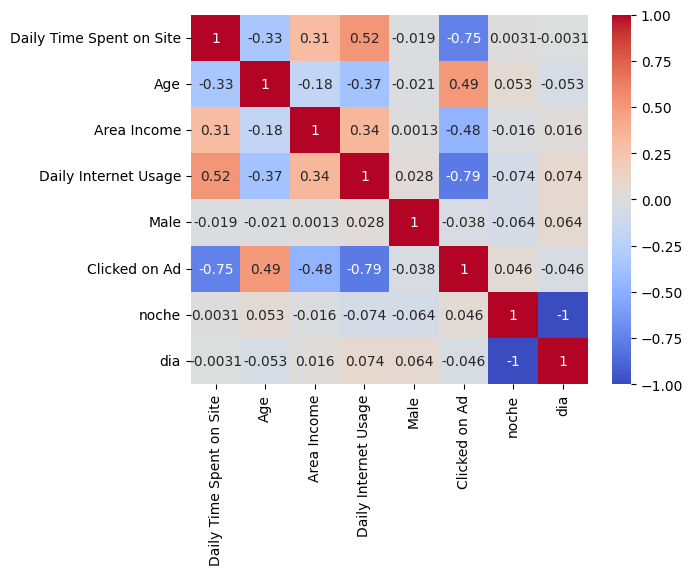

In [61]:
sns.heatmap(data = anuncio.corr(numeric_only = True), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

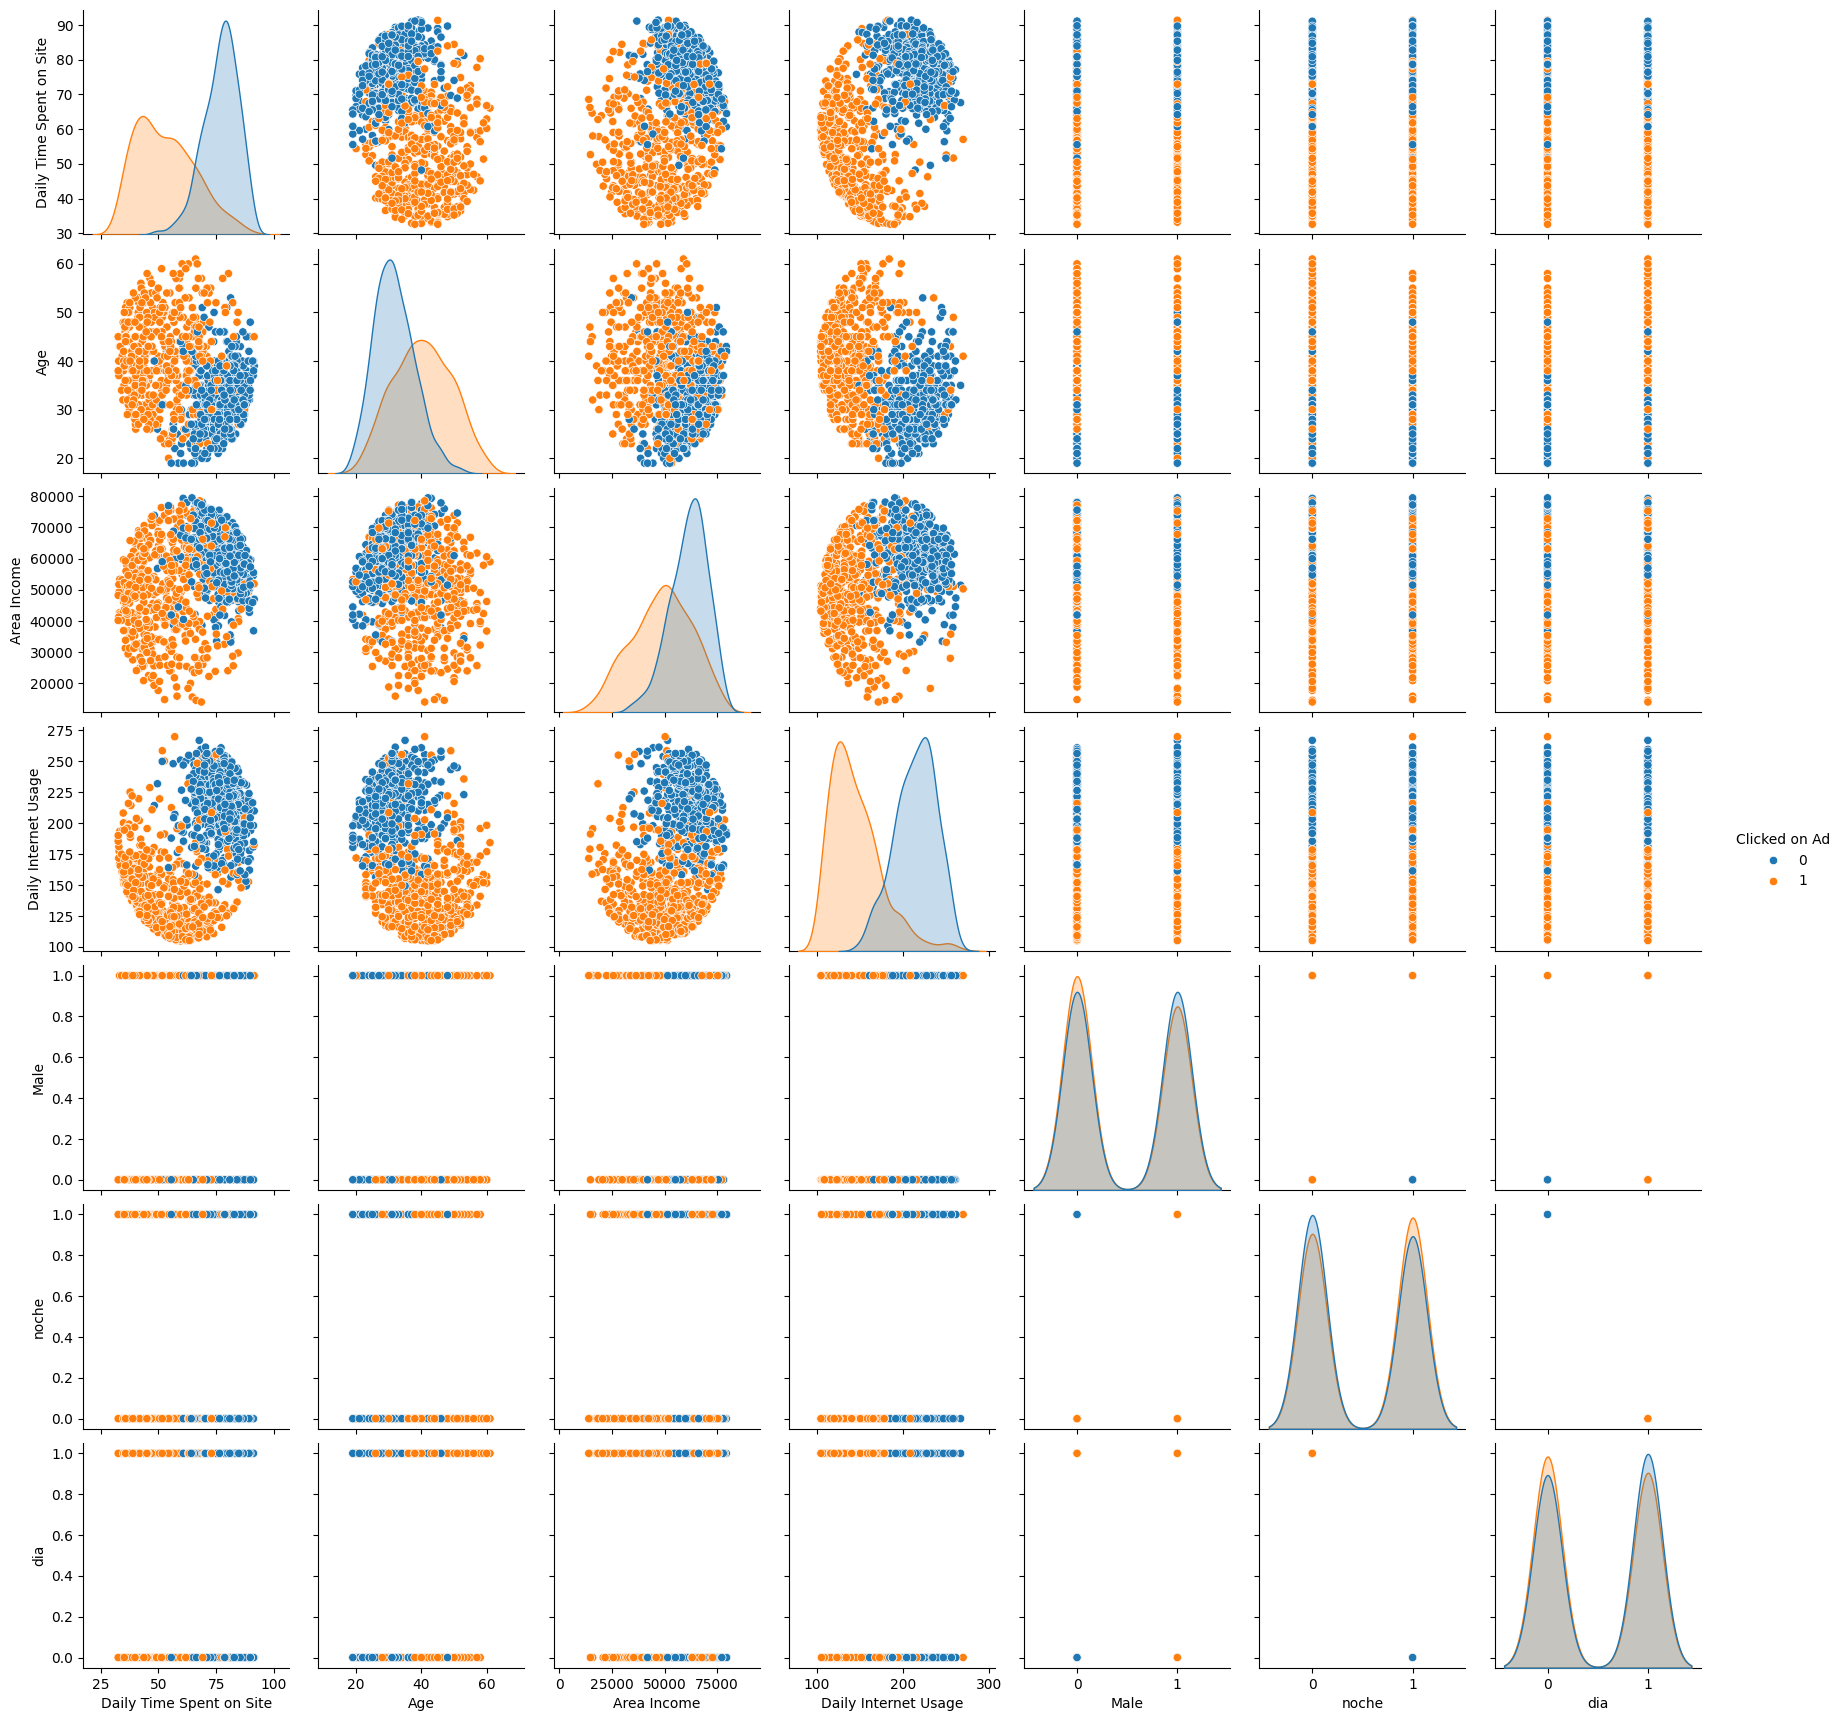

In [65]:
sns.pairplot(data = anuncio, hue = 'Clicked on Ad')

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [49]:
anuncio['Timestamp'] = pd.to_datetime(anuncio['Timestamp'])

In [51]:
anuncio['noche'] = (anuncio['Timestamp'].dt.hour < 12).astype(int)

In [52]:
anuncio['dia'] = (anuncio['Timestamp'].dt.hour >= 12).astype(int)

In [75]:
anuncio['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [78]:
paises = pd.get_dummies(anuncio['Country']).astype(int)

In [81]:
anuncio = pd.concat([anuncio, paises], axis = 1)

In [ ]:
len(anuncio.groupby('Ad Topic Line').count().index)
# se observa que los valores son demasiado diferentes como para que puedan tener alguna relación clara

1000

In [ ]:
len(anuncio.groupby('City').count().index)
# se observa que los valores son demasiado diferentes como para que puedan tener alguna relación clara

969


#### 2. Train test split


In [66]:
from sklearn.linear_model import LogisticRegression

In [89]:
X = anuncio[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'noche', 'dia', ]]
y = anuncio['Clicked on Ad']

In [90]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(800,)
(200,)



#### 3. StandardScaler()


In [69]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [71]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Cross validation

In [100]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.9875 0.9625 1.     0.9875 0.9625 0.9375 0.9625 0.95   0.9875 0.9875]
Logistic Regression: 0.972500 (0.019203)


# 4. Evaluation


#### 0. Accuracy

In [94]:
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.945


Predicciones correctas / total predicciones

TP + TN / (TP + TN + FP + FN)


#### 1. Confusion Matrix


In [101]:
c_matrix = confusion_matrix(y_test, predictions)

<Axes: >

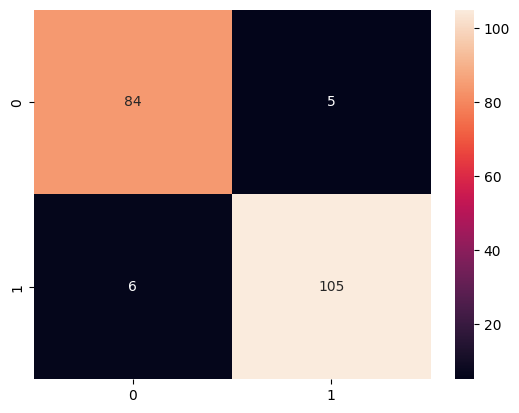

In [118]:
sns.heatmap(data = c_matrix, annot = True, fmt = '.0f')

<Axes: >

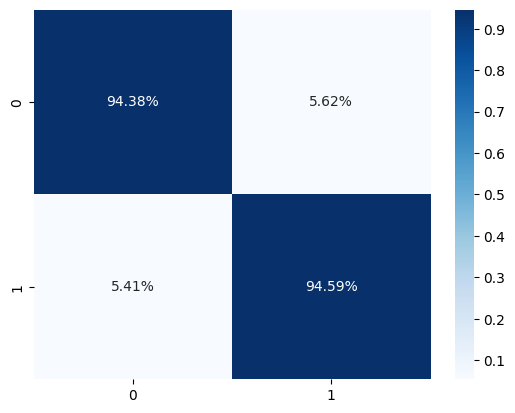

In [98]:
sns.heatmap(confusion_matrix(y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues')

In [113]:
c_matrix

array([[ 84,   5],
       [  6, 105]])


#### 2. Precision


In [124]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



In [121]:
print(precision_score(y_test, predictions))

0.9545454545454546


In [126]:
# 105 son 1s de verdad y 5 de ellos los ha catalogado como 1 cuando no lo eran, una proporción de 0.954 aciertos



#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [122]:
print(recall_score(y_test, predictions))

0.9459459459459459


In [123]:
# 105 son 1s de verdad y 6 no los ha catalogado como 1 cuando no lo eran, una proporción de 0.959 aciertos



#### 4. F1 Score


2 * p * r / (r + p)

In [125]:
print(f1_score(y_test, predictions))

0.9502262443438914




#### 5. ROC curve

In [127]:
from sklearn.metrics import roc_curve

In [132]:
y_probs = model.predict_proba(X_test)[:, 1]

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

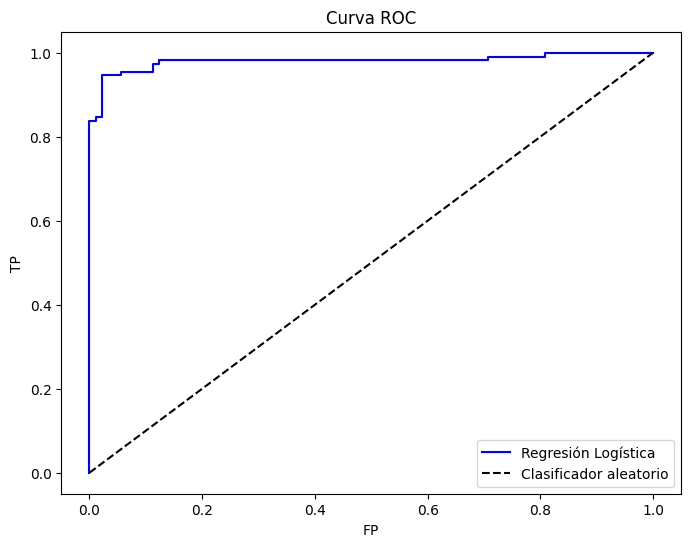

In [136]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Regresión Logística')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('Curva ROC')
plt.legend()
plt.show()



#### 6. P-R curve

In [141]:
from sklearn.metrics import precision_recall_curve

In [138]:
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

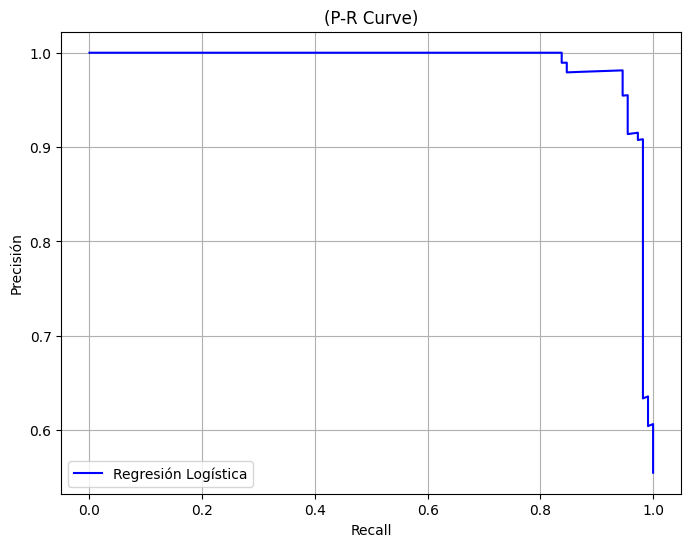

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Regresión Logística')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('(P-R Curve)')
plt.legend()
plt.grid(True)
plt.show()